In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class ShallowNetwork(tf.keras.models.Model):
  def __init__(self, n_h, activation='sigmoid'):
    super(ShallowNetwork, self).__init__()
    self.activation = activation
    self.n_h = n_h
    self.hidden_layer = tf.keras.layers.Dense(units=self.n_h, activation=self.activation, input_shape=(1,))
    self.output_layer = tf.keras.layers.Dense(units=1, activation='linear')
    
  def call(self, X):
    with tf.GradientTape() as tape:
      X = tf.convert_to_tensor(X)
      tape.watch(X)
      response = self.hidden_layer(X)
      response = self.output_layer(response)
    grads = tape.gradient(response, X)
    return grads
    
#   def call(self, X):
# #     X = tf.convert_to_tensor(X)
#     response = self.hidden_layer(X)
#     return self.output_layer(response) 
    
  def call_non_der(self, X):
    X = tf.convert_to_tensor(X)
    response = self.hidden_layer(X)
    response = self.output_layer(response)
    return response

In [ ]:
net = ShallowNetwork(10)

In [ ]:
X = np.arange(-1,1,0.01).reshape(-1,1)
Y = 2*X

In [ ]:
loss_obj = tf.keras.metrics.mean_squared_error
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
train_loss = tf.keras.metrics.Mean('train')

In [ ]:
@tf.function
def train_step(x, y):
#   print(net)
  with tf.GradientTape() as tape:
    preds = net.call(x)
    loss = loss_obj(y, preds)
  gradients = tape.gradient(loss, net.trainable_variables)
  optimizer.apply_gradients(zip(gradients, net.trainable_variables))
  
  train_loss(loss)

W0417 17:30:08.282968 140530483042048 optimizer_v2.py:928] Gradients does not exist for variables ['dense_3/bias:0'] when minimizing the loss.
W0417 17:30:08.827964 140530483042048 optimizer_v2.py:928] Gradients does not exist for variables ['dense_3/bias:0'] when minimizing the loss.


1.4852105


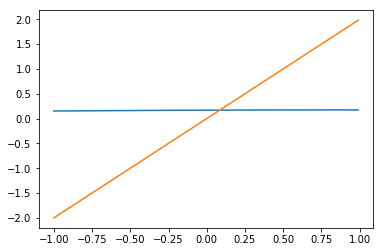

1.4175086
1.3806077
1.3616563
1.3505353
1.3411621
1.3308651
1.3187774
1.3046935
1.2884939
1.2699215


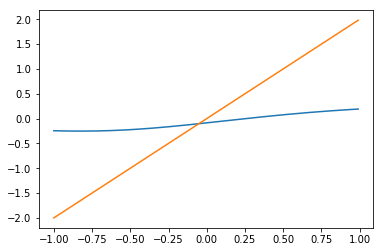

1.2485937
1.2241019
1.1961105
1.1644309
1.1290823
1.090347
1.0488113
1.0053937
0.9613529
0.9182433


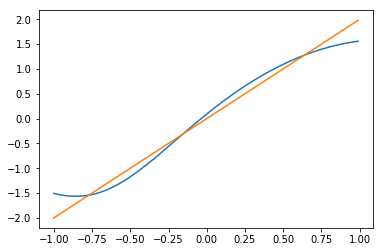

0.8777602
0.84140337
0.8099641
0.7831051
0.75950813
0.7375781
0.7161128
0.69458294
0.67307246
0.65204227


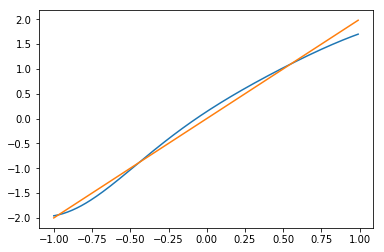

0.6320475
0.61349916
0.59653664
0.5810358
0.56670964
0.5532248
0.5402871
0.5276899
0.515335
0.5032311


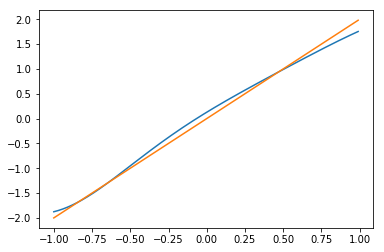

0.49146932
0.48017612
0.46945563
0.45934445
0.4498011
0.44072872
0.43201432
0.42356485
0.41533053
0.40730828


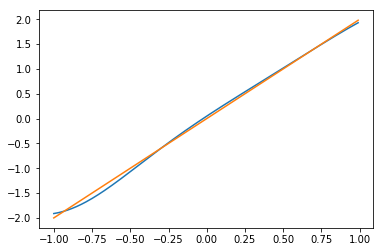

0.39952722
0.39202452
0.38482445
0.3779279
0.3713144
0.36495015
0.35879865
0.35282955
0.34702426
0.3413773


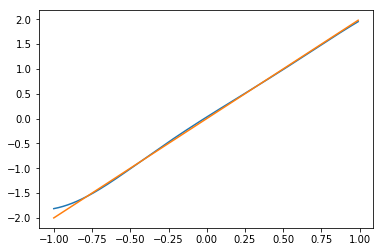

0.33589303
0.33057958
0.3254416
0.32047653
0.3156742
0.3110198
0.30649793
0.3020965
0.29780874
0.29363284


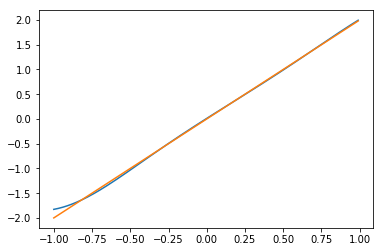

0.2895697
0.28561983
0.2817814
0.27804986
0.27441874
0.270881
0.26743042
0.26406264
0.2607753
0.25756726


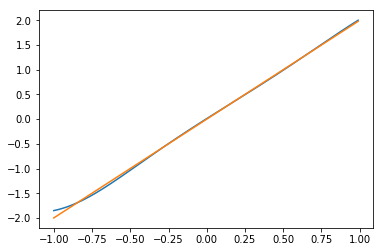

0.25443766
0.25138488
0.2484064
0.2454987
0.24265812
0.23988132
0.23716584
0.23450993
0.2319125
0.22937232


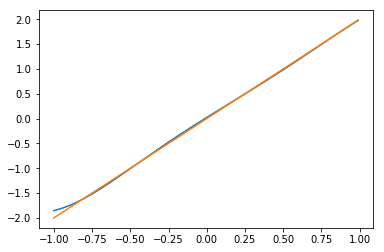

0.22688796
0.2244575
0.22207889
0.21974997
0.2174689
0.21523418
0.21304461
0.2108992
0.20879684
0.20673634


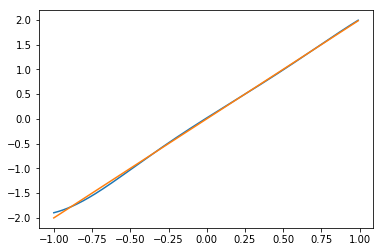

0.20471637
0.20273554
0.20079254
0.19888626
0.1970157
0.19518
0.19337831
0.19160978
0.18987343
0.1881683


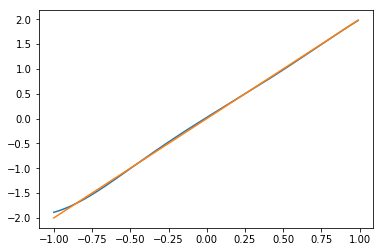

0.18649353
0.18484825
0.18323171
0.18164322
0.1800821
0.17854768
0.17703925
0.17555615
0.1740977
0.17266327


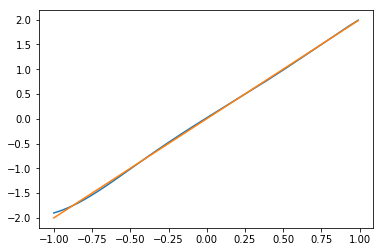

0.1712523
0.16986424
0.16849853
0.16715467
0.16583212
0.16453037
0.16324893
0.16198729
0.16074502
0.15952171


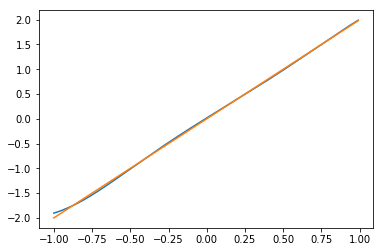

0.15831691
0.15713021
0.1559612
0.15480947
0.15367468
0.1525564
0.15145431
0.15036805
0.1492973
0.1482417


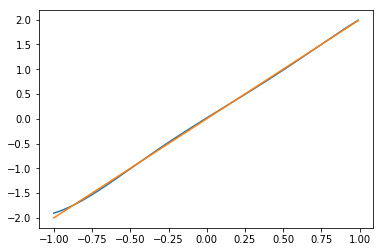

0.14720096
0.14617476
0.14516278
0.14416474
0.14318036
0.14220934
0.14125143
0.14030637
0.13937388
0.13845372


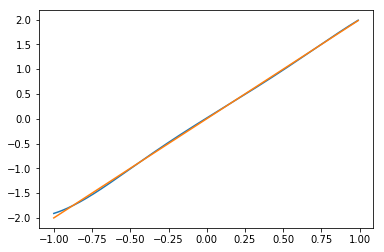

0.13754565
0.13664943
0.13576484
0.13489164
0.13402964
0.13317859
0.13233829
0.13150853
0.13068913
0.1298799


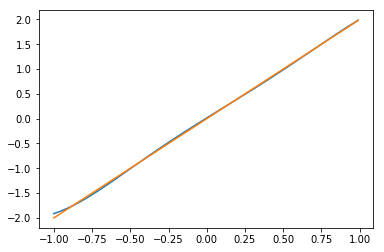

0.12908064
0.12829117
0.12751132
0.12674092
0.12597977
0.12522772
0.12448461
0.12375029
0.12302458
0.12230736


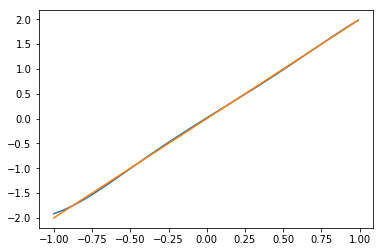

0.12159845
0.12089773
0.12020505
0.11952027
0.11884326
0.11817388
0.11751202
0.11685754
0.11621033
0.11557025


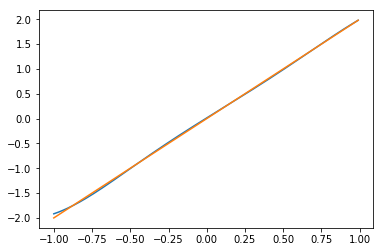

0.11493719
0.11431104
0.11369169
0.11307901
0.11247291
0.11187328
0.11128001
0.11069302
0.110112205
0.10953745


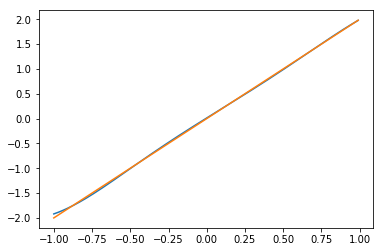

0.10896867
0.10840578
0.10784867
0.10729728
0.106751494
0.106211245
0.10567644
0.105147
0.10462285
0.10410391


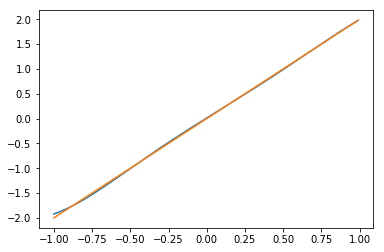

0.103590086
0.103081316
0.10257753
0.10207865
0.101584606
0.10109532
0.100610726
0.100130774
0.099655375
0.099184476


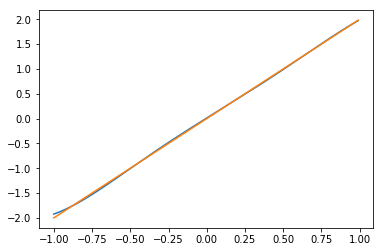

0.09871802
0.09825593
0.09779815
0.097344615
0.09689528
0.09645007
0.09600894
0.09557184
0.09513869
0.09470946


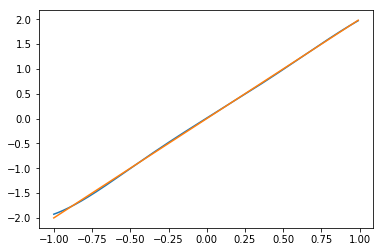

0.094284095
0.09386253
0.093444735
0.09303064
0.0926202
0.09221338
0.09181011
0.091410354
0.09101407
0.09062122


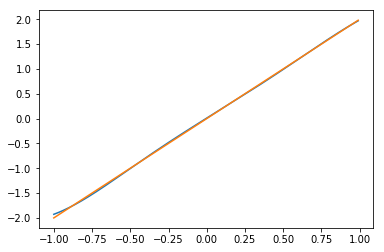

0.09023175
0.089845605
0.08946276
0.089083165
0.08870678
0.08833357
0.087963484
0.0875965
0.08723257
0.08687165


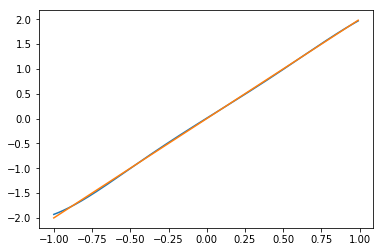

0.086513706
0.08615869
0.08580659
0.08545736
0.08511096
0.084767364
0.08442654
0.08408844
0.083753034
0.08342031


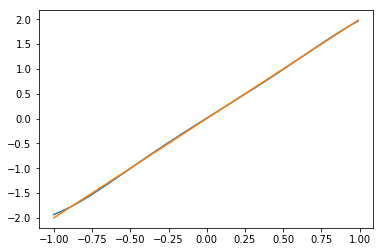

0.08309021
0.08276272
0.0824378
0.082115434
0.08179558
0.08147821
0.081163295
0.08085081
0.08054072
0.080233


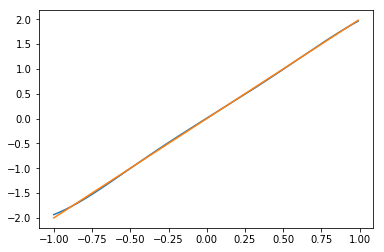

0.07992762
0.07962457
0.07932381
0.07902531
0.07872906
0.07843502
0.07814317
0.077853486
0.077565946
0.07728053


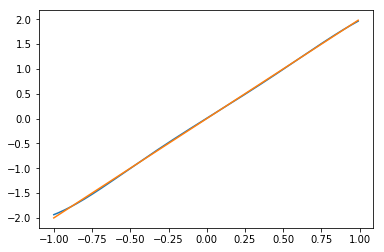

0.0769972
0.07671594
0.07643674
0.07615956
0.07588439
0.0756112
0.07533997
0.07507069
0.074803315
0.07453785


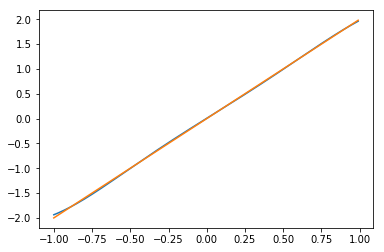

0.07427427
0.07401254
0.07375266
0.0734946
0.07323833
0.072983846
0.07273114
0.072480164
0.07223092
0.0719834


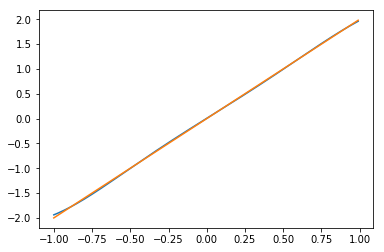

0.07173755
0.07149339
0.071250886
0.07101002
0.070770785
0.07053316
0.07029712
0.07006266
0.06982976
0.06959841


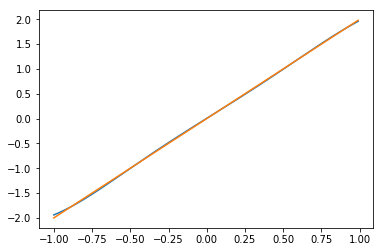

0.06936858
0.06914027
0.06891346
0.06868814
0.06846429
0.06824189
0.06802093
0.0678014
0.067583285
0.06736657


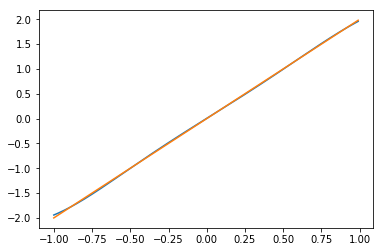

0.06715125
0.06693729
0.066724695
0.06651346
0.06630355
0.066094965
0.06588769
0.06568171
0.06547702
0.065273605


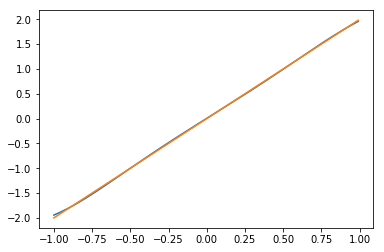

0.06507145
0.06487054
0.06467087
0.06447243
0.06427521
0.06407919
0.06388436
0.063690715
0.06349824
0.063306935


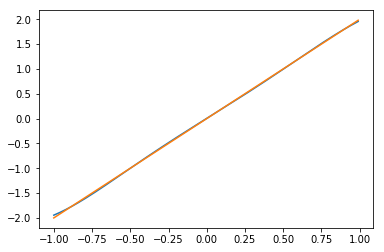

0.063116774
0.06292775
0.062739864
0.0625531
0.06236744
0.062182877
0.06199941
0.061817024
0.061635714
0.061455466


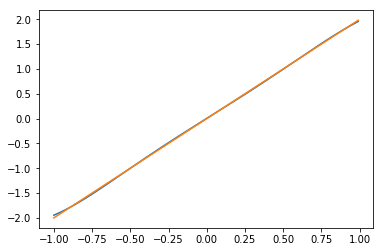

0.061276264
0.061098106
0.060920984
0.06074489
0.060569815
0.06039574
0.060222667
0.060050584
0.059879486
0.059709363


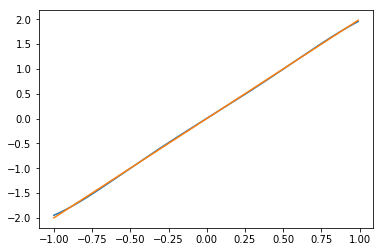

0.059540205
0.059371997
0.059204742
0.05903843
0.05887305
0.058708597
0.058545064
0.058382444
0.058220718
0.058059886


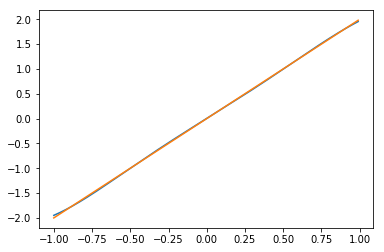

0.057899944
0.057740886
0.0575827
0.05742538
0.05726892
0.057113305
0.056958538
0.05680461
0.056651514
0.05649924


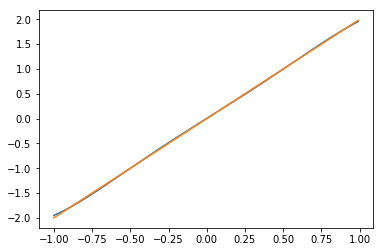

0.056347787
0.056197148
0.056047305
0.05589826
0.055750012
0.055602547
0.055455863
0.055309955
0.055164814
0.05502043


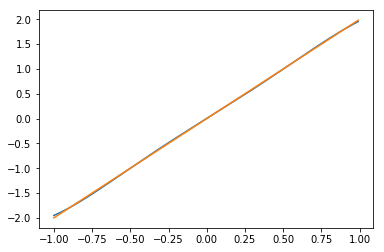

0.054876797
0.054733917
0.054591782
0.054450385
0.054309722
0.05416978
0.054030567
0.053892065
0.05375427
0.053617176


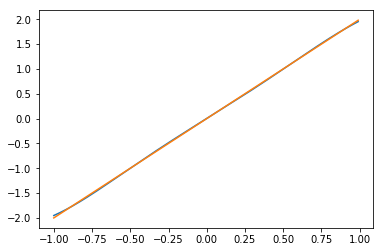

0.053480785
0.053345088
0.053210076
0.053075753
0.052942105
0.05280913
0.05267682
0.052545168
0.05241418
0.052283842


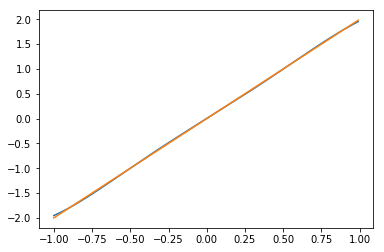

0.052154154
0.052025106
0.051896702
0.05176893
0.051641785
0.051515266
0.051389363
0.051264074
0.0511394
0.05101533


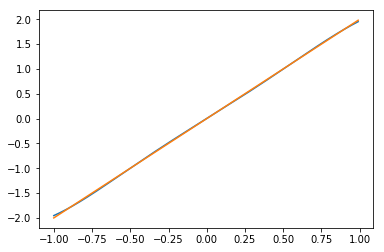

0.05089186
0.05076899
0.050646715
0.050525025
0.050403923
0.050283402
0.05016345
0.050044075
0.049925264
0.04980702


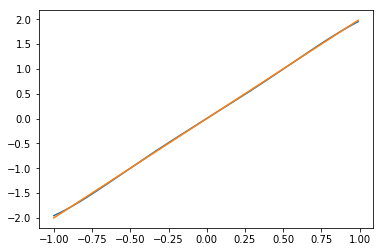

0.049689334
0.049572207
0.04945563
0.049339604
0.04922412
0.04910918
0.04899477
0.04888089
0.048767544
0.048654724


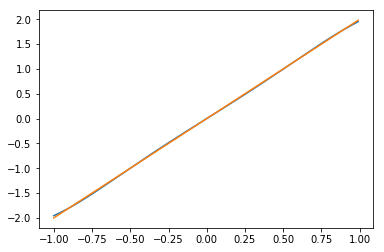

0.048542425
0.048430644
0.048319377
0.048208624
0.048098378
0.04798864
0.047879398
0.047770653
0.0476624
0.047554635


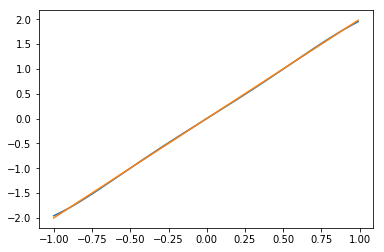

0.04744736
0.047340572
0.04723426
0.047128428
0.047023073
0.046918187
0.046813767
0.046709817
0.046606325
0.04650329


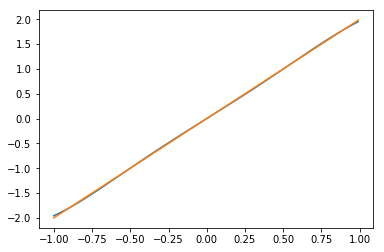

0.046400707
0.04629858
0.0461969
0.04609567
0.045994885
0.045894537
0.04579463
0.045695156
0.045596115
0.045497507


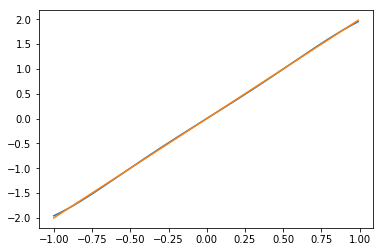

0.045399323
0.04530156
0.045204215
0.04510729
0.045010783
0.044914685
0.044819
0.044723727
0.044628855
0.044534385


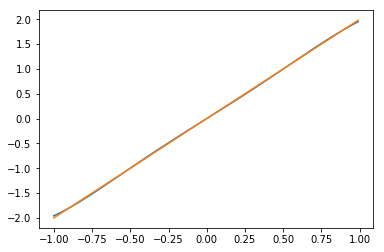

0.044440318
0.04434665
0.04425337
0.04416049
0.044067994
0.043975882
0.043884158
0.043792818
0.043701857
0.043611277


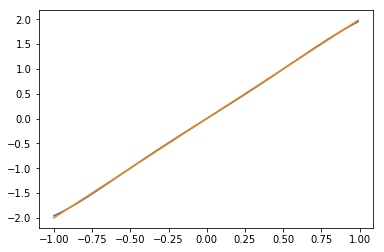

0.04352107
0.043431237
0.043341774
0.043252684
0.043163955
0.043075595
0.042987596
0.04289995
0.042812664
0.042725734


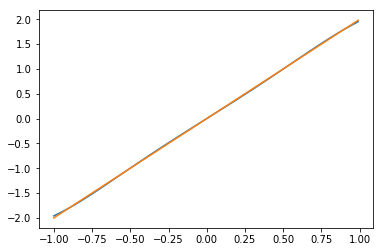

0.042639155
0.04255293
0.04246705
0.04238152
0.042296335
0.04221149
0.04212699
0.042042825
0.041959
0.041875508


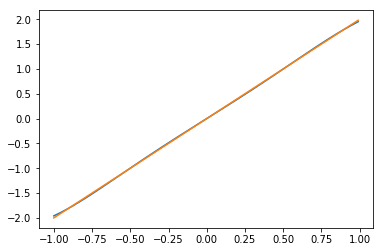

0.041792348
0.041709512
0.04162701
0.04154483
0.041462976
0.041381445
0.041300237
0.041219346
0.041138772
0.041058514


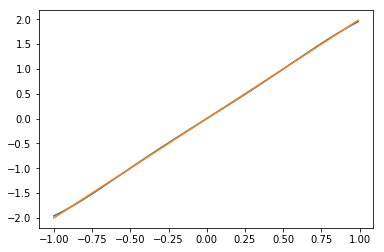

0.04097857
0.040898938
0.040819615
0.040740598
0.04066189
0.040583488
0.04050538
0.040427577
0.04035007
0.04027286


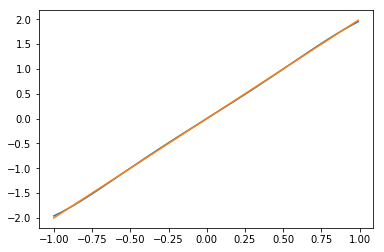

0.04019595
0.04011933
0.040043004
0.03996697
0.039891224
0.039815765
0.039740592
0.039665703
0.039591096
0.039516773


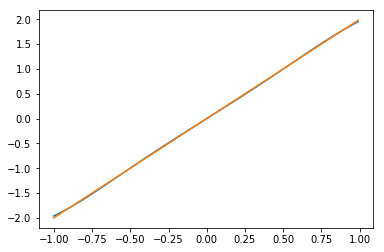

0.03944272
0.03936895
0.039295454
0.039222233
0.039149284
0.039076608
0.039004203
0.038932063
0.038860194
0.038788587


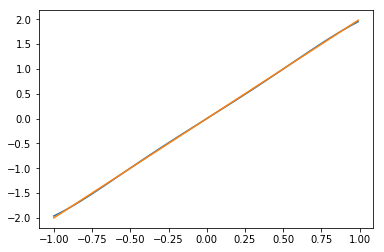

0.038717248
0.03864617
0.038575355
0.038504798
0.038434498
0.03836446
0.03829467
0.038225133
0.03815585
0.03808682


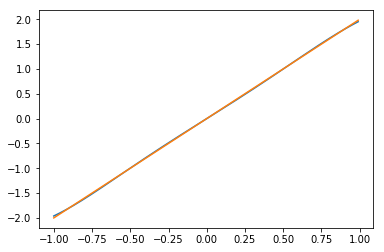

0.038018037
0.037949506
0.03788122
0.037813183
0.037745386
0.037677836
0.037610527
0.03754346
0.037476633
0.037410043


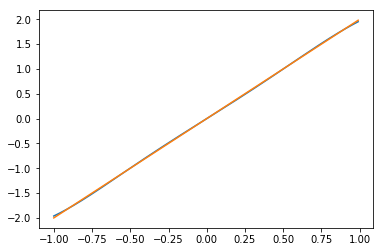

0.03734369
0.037277568
0.03721168
0.037146028
0.037080605
0.037015412
0.03695045
0.03688572
0.036821213
0.036756933


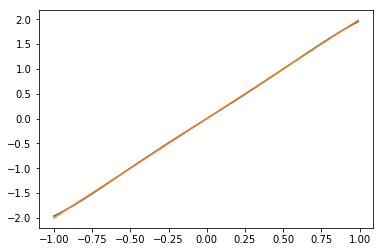

0.036692876
0.036629044
0.036565434
0.03650205
0.03643888
0.03637593
0.0363132
0.03625068
0.036188375
0.036126286


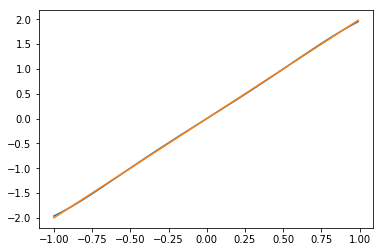

0.036064412
0.036002748
0.035941295
0.035880055
0.03581902
0.035758197
0.03569758
0.035637166
0.03557696
0.035516955


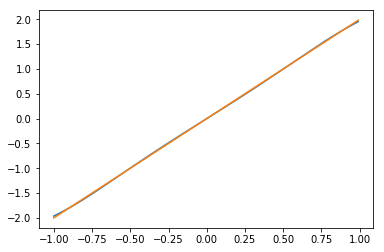

0.035457153
0.035397556
0.035338156
0.035278957
0.035219952
0.035161145
0.035102535
0.03504412
0.0349859
0.034927875


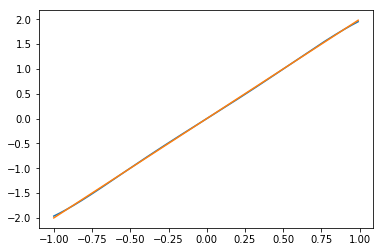

0.034870043
0.034812402
0.03475495
0.03469769
0.034640618
0.034583732
0.034527037
0.03447053
0.034414202
0.03435806


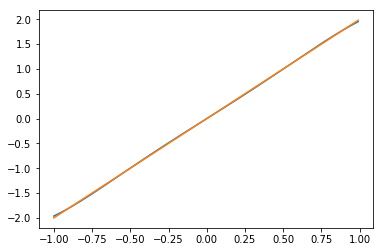

0.034302104
0.034246325
0.03419073
0.03413531
0.034080077
0.03402502
0.03397014
0.03391544
0.033860914
0.033806566


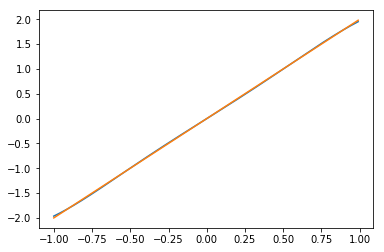

0.03375239
0.03369839
0.03364456
0.033590905
0.03353742
0.03348411
0.033430964
0.03337799
0.03332518
0.03327254


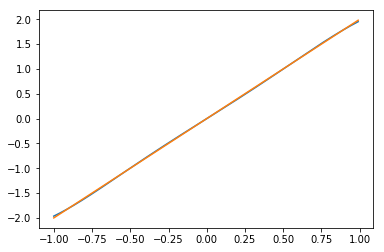

0.03322006
0.03316775
0.033115603
0.033063624
0.033011805
0.03296015
0.032908656
0.032857325
0.03280615
0.03275514


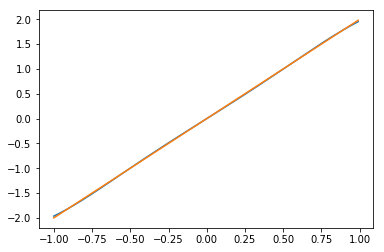

0.032704286
0.032653593
0.032603055
0.032552674
0.03250245
0.03245238
0.03240246
0.032352697
0.032303084
0.032253623


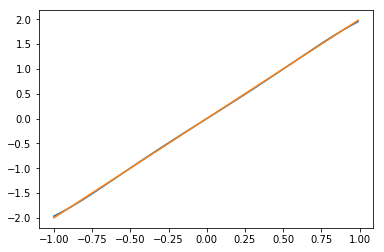

0.032204315
0.03215516
0.032106154
0.032057296
0.03200859
0.03196003
0.03191162
0.031863354
0.031815235
0.03176726


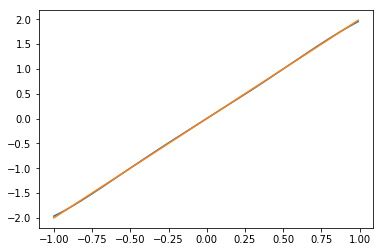

0.03171943
0.031671748
0.03162421
0.031576812
0.031529557
0.03148244
0.031435464
0.031388626
0.031341933
0.031295374


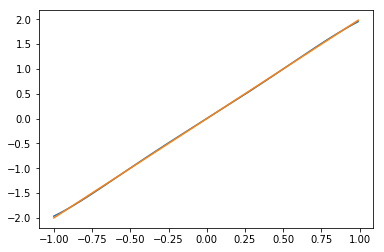

0.031248957
0.031202678
0.031156534
0.031110529
0.03106466
0.031018924
0.030973325
0.030927861
0.030882528
0.030837331


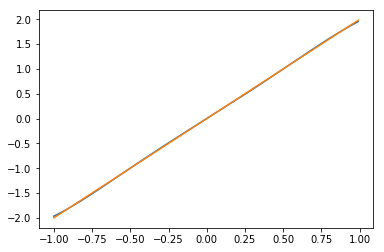

0.030792264
0.030747332
0.03070253
0.030657858
0.030613312
0.030568898
0.030524611
0.030480454
0.030436425
0.030392522


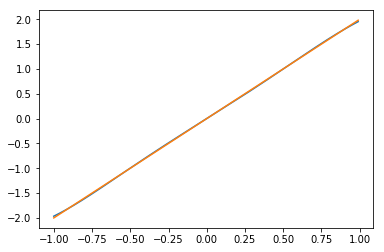

0.030348748
0.030305099
0.030261574
0.030218177
0.030174904
0.030131755
0.03008873
0.030045828
0.030003048
0.02996039


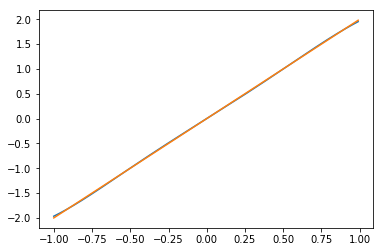

0.029917855
0.02987544
0.029833145
0.029790971
0.029748913
0.029706972
0.029665152
0.029623449
0.029581863
0.029540394


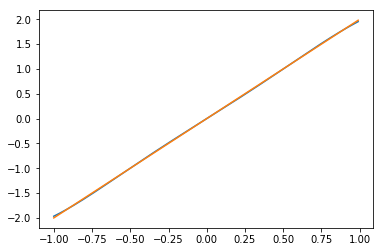

0.029499043
0.029457806
0.029416686
0.02937568
0.02933479
0.029294012
0.029253349
0.029212797
0.029172359
0.029132035


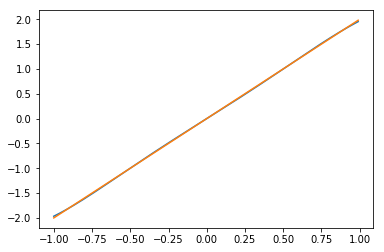

0.02909182
0.029051717
0.029011726
0.028971845
0.02893207
0.028892403
0.028852848
0.0288134
0.02877406
0.028734827


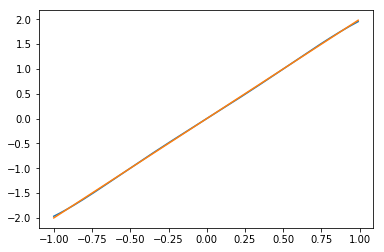

0.028695703
0.028656684
0.028617771
0.028578965
0.028540265
0.028501669
0.028463177
0.02842479
0.028386507
0.028348329


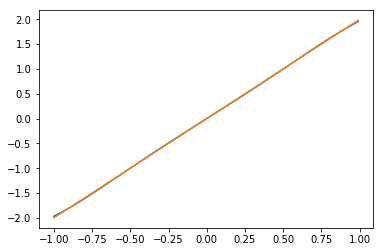

0.02831025
0.028272277
0.028234404
0.028196633
0.028158965
0.028121391
0.02808392
0.028046548
0.028009277
0.027972104


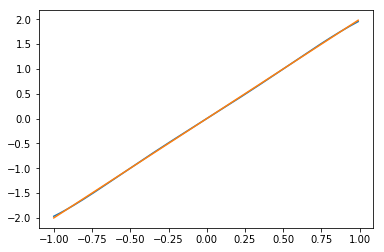

0.027935032
0.027898056
0.02786118
0.0278244
0.027787717
0.027751133
0.027714644
0.027678251
0.027641956
0.027605753


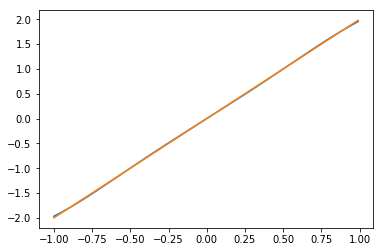

0.027569648
0.027533635
0.027497718
0.027461896
0.027426165
0.027390528
0.027354982
0.027319526
0.027284164
0.027248893


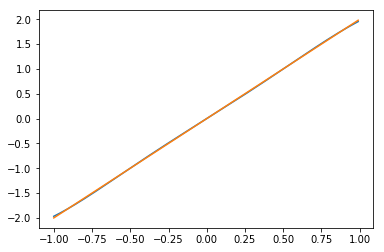

0.027213713
0.027178625
0.027143627
0.02710872
0.027073903
0.027039174
0.027004536
0.026969986
0.026935525
0.026901152


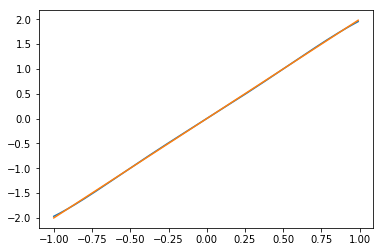

0.026866866
0.02683267
0.02679856
0.026764536
0.0267306
0.026696749
0.026662985
0.026629306
0.026595712
0.0265622


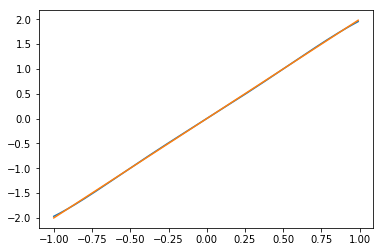

0.026528774
0.02649543
0.026462171
0.026428996
0.026395904
0.026362896
0.02632997
0.026297126
0.026264364
0.026231686


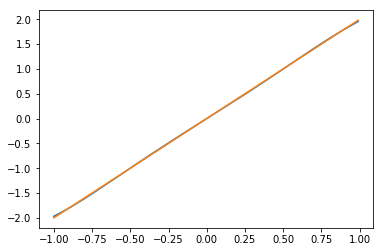

0.026199088
0.02616657
0.026134133
0.026101777
0.026069503
0.026037307
0.026005192
0.025973156
0.025941199
0.02590932


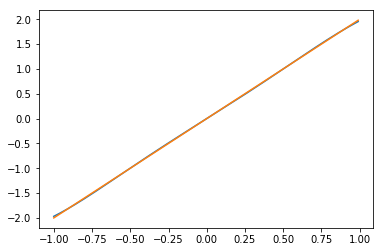

0.02587752
0.025845798
0.025814151
0.025782583
0.025751092
0.025719676
0.025688339
0.025657078
0.025625894
0.025594784


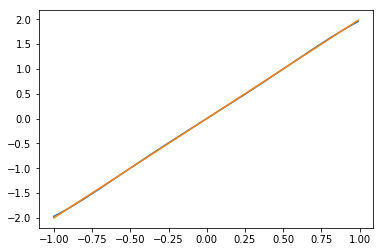

0.02556375
0.025532793
0.02550191
0.025471102
0.025440369
0.02540971
0.025379125
0.025348615
0.025318177
0.025287813


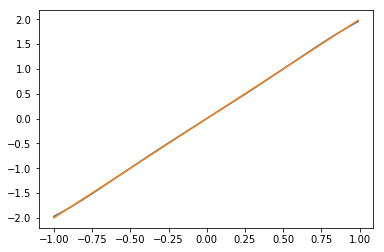

0.025257522
0.025227303
0.025197158
0.025167083
0.025137082
0.025107147
0.025077285
0.025047496
0.025017776
0.024988126


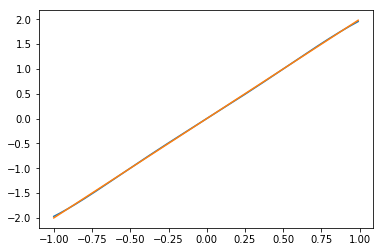

0.024958549
0.02492904
0.024899602
0.024870234
0.024840934
0.024811704
0.024782542
0.02475345
0.024724426
0.024695469


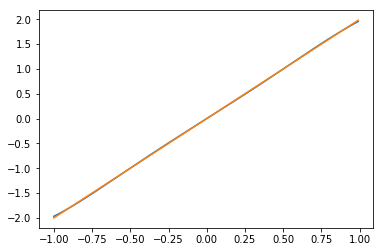

0.024666581
0.024637762
0.024609009
0.024580324
0.024551705
0.024523154
0.024494668
0.02446625
0.024437897
0.02440961


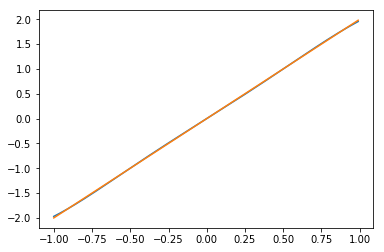

0.024381386
0.024353229
0.024325134
0.024297107
0.024269143
0.024241244
0.024213409
0.024185637
0.02415793
0.024130287


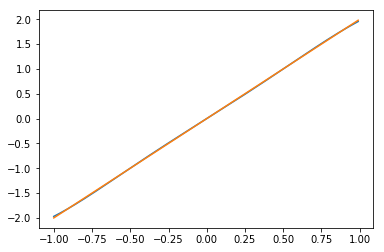

0.024102708
0.024075191
0.024047738
0.024020346
0.023993017
0.023965752
0.023938548
0.023911405
0.023884324
0.023857305


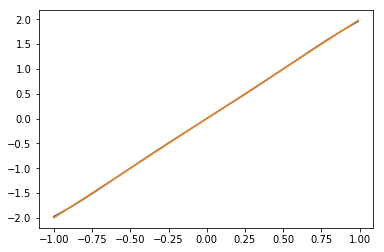

0.023830349
0.02380345
0.023776615
0.02374984
0.023723125
0.023696467
0.02366987
0.023643333
0.023616856
0.023590438


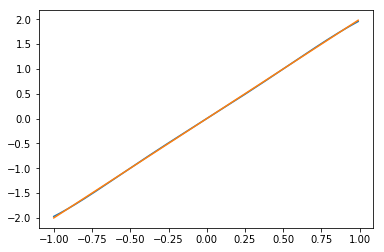

0.023564078
0.023537777
0.023511536
0.023485355
0.02345923
0.023433164
0.023407156
0.023381207
0.023355315
0.02332948


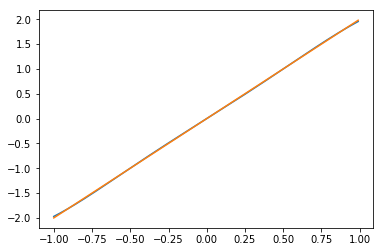

0.023303702
0.023277981
0.023252318
0.02322671
0.02320116
0.023175666
0.023150228
0.023124848
0.023099521
0.02307425


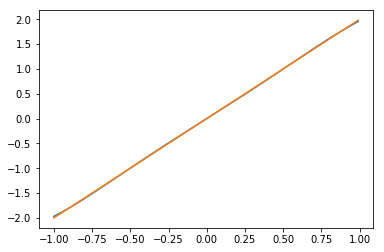

0.023049036
0.023023875
0.022998769
0.022973716
0.022948718
0.022923775
0.022898884
0.02287405
0.02284927
0.022824543


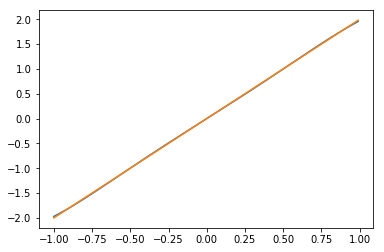

0.02279987
0.02277525
0.022750683
0.022726169
0.022701709
0.0226773
0.022652946
0.022628643
0.022604393
0.022580193


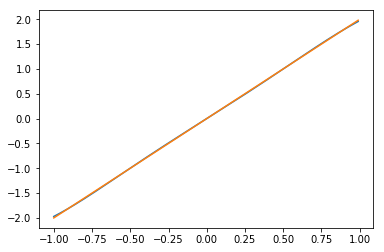

0.022556048
0.022531953
0.02250791
0.022483919
0.022459978
0.022436088
0.02241225
0.022388462
0.022364724
0.022341035


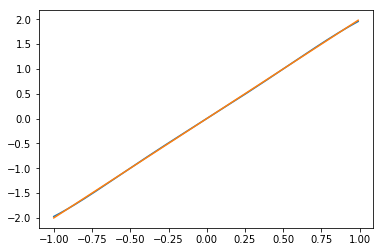

0.022317396
0.022293808
0.02227027
0.022246782
0.022223342
0.022199951
0.022176612
0.02215332
0.022130078
0.022106884


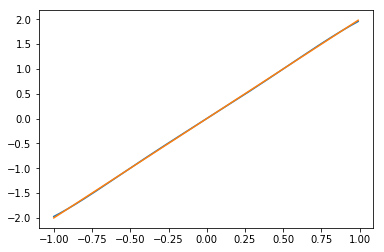

0.02208374
0.022060644
0.022037597
0.022014597
0.021991646
0.021968743
0.021945888
0.02192308
0.021900319
0.021877607


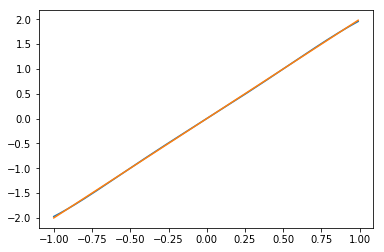

0.02185494
0.021832323
0.021809751
0.021787226
0.021764748
0.021742316
0.02171993
0.021697588
0.021675292
0.021653043


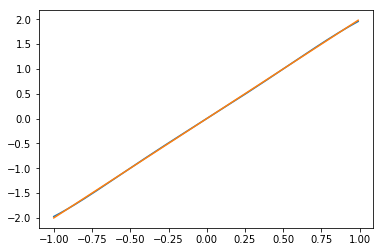

0.021630839
0.02160868
0.021586569
0.0215645
0.021542478
0.021520501
0.021498568
0.021476682
0.021454839
0.02143304


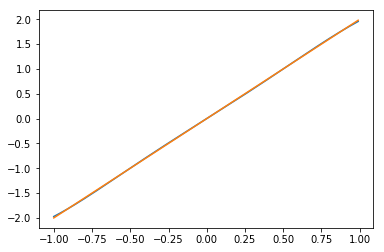

0.021411287
0.021389578
0.021367911
0.02134629
0.021324713
0.021303179
0.02128169
0.021260243
0.02123884
0.021217478


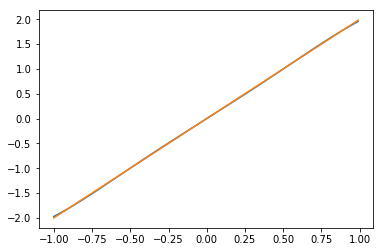

0.02119616
0.021174887
0.021153655
0.021132467
0.02111132
0.021090217
0.021069152
0.02104813
0.021027151


In [ ]:
EPOCHS = 1000

for epoch in range(EPOCHS):
#   old_weights = np.copy(net.layers[0].weights[0].numpy())
#   old_weights = np.copy(net.layers[0].weights[0].numpy())
  train_step(X, Y)
  print(train_loss.result().numpy())
#   print(old_weights)
#   print((old_weights - net.layers[0].weights[0].numpy()).sum())
  if epoch % 10 == 0:
    pred = net.call(tf.convert_to_tensor(X,dtype='float32')).numpy()
    plt.plot(X, pred)
    plt.plot(X, Y)
    plt.show()

In [ ]:
net.predict(X)

array([[-1.97172141e+00],
       [-1.95572805e+00],
       [-1.93946958e+00],
       [-1.92295456e+00],
       [-1.90619206e+00],
       [-1.88919079e+00],
       [-1.87195957e+00],
       [-1.85450685e+00],
       [-1.83684146e+00],
       [-1.81897175e+00],
       [-1.80090594e+00],
       [-1.78265285e+00],
       [-1.76422036e+00],
       [-1.74561656e+00],
       [-1.72684956e+00],
       [-1.70792723e+00],
       [-1.68885696e+00],
       [-1.66964686e+00],
       [-1.65030408e+00],
       [-1.63083601e+00],
       [-1.61124980e+00],
       [-1.59155238e+00],
       [-1.57175052e+00],
       [-1.55185115e+00],
       [-1.53186071e+00],
       [-1.51178539e+00],
       [-1.49163151e+00],
       [-1.47140515e+00],
       [-1.45111191e+00],
       [-1.43075764e+00],
       [-1.41034782e+00],
       [-1.38988781e+00],
       [-1.36938262e+00],
       [-1.34883738e+00],
       [-1.32825673e+00],
       [-1.30764532e+00],
       [-1.28700769e+00],
       [-1.26634812e+00],
       [-1.2

In [ ]:
pred = net.call_non_der(tf.convert_to_tensor(X,dtype='float32')).numpy()

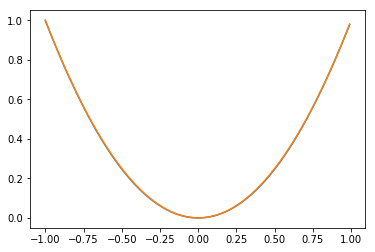

In [ ]:
plt.plot(X, pred-pred[int(pred.shape[0]*0.5)])
plt.plot(X, X**2)
plt.show()